# Motivation
- Data preprocessing is an essential part of machine learning pipeline. Data preprocessing sometimes overlaps concept of data wraggling, feature engineering. Today we will focus on the subtopic of data scaling/transformation. 
- StandScaler, MinMaxScaler are some data preprocessing tools you probabely have heard of. In fact, Sklearn's preprocssing module are exclusive to data scaling/transformaiton tools. 
- We know that data preprocessing is important. But it is still not very clear  when and which scalers/transformerers to use. i.e. This post is motivated by a [Sklearn's tutorial](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). We might have been suggested to perform some sort of data scaling before PCA, and many people used StandardScaler, but is it the best choice?

With the convention from Sklearn, scalers like StandardScaler are usually called linear scalers, while the transforms like PowerTransformer are called non-linear scalers.

# Things you will learn
- To understand the challenge for data engineering and how data transformation can help to deal with messy data, i.e. StandardScaler, MaxAbsScaler, MaxAbsScaler, etc
- What PCA can do, how to perform PCA, especially how to preprocess data for PCA. 
- To answer the question, can PCA handel categorical data? If so, how?

In [10]:
# load packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import load_wine, fetch_california_housing

RANDOM_STATE = 2020


In [2]:
# customer function
# comparing differt transformers
def transformer_bundle(X_train):

    transformer_list = ['NoTransformer', 'StandardScaler', 'QuantileTransformer', 'RobustScaler', 'Normalizer', 
                        'MaxAbsScaler', 'MinMaxScaler', 'PowerTransformer']

    X_train_backup = X_train.copy()

    X_train_trans_list= []   
    X_train_pca_list = []
    for i in range(len(transformer_list)):
        X_train = X_train_backup.copy()
        if i ==0:
            pass
        elif i ==1:    
            ss = StandardScaler()
            X_train = ss.fit_transform(X_train)
        elif i ==2:
            qt = QuantileTransformer()
            X_train = qt.fit_transform(X_train)
        elif i ==3:
            rs = RobustScaler()
            X_train = rs.fit_transform(X_train)
        elif i ==4:
            nl = Normalizer()
            X_train = nl.fit_transform(X_train)
        elif i ==5:
            mas = MaxAbsScaler()
            X_train = mas.fit_transform(X_train)
        elif i ==6:
            mms = MinMaxScaler()
            X_train = mms.fit_transform(X_train)
        elif i ==7:
            pt = PowerTransformer()
            X_train = pt.fit_transform(X_train)

        X_train_trans_list.append(np.array(X_train))
        pca = PCA()
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_list.append(np.array(X_train_pca))
        
    return X_train_trans_list, X_train_pca_list

In [3]:
# customer function
# pca scatter plot
def pca_scatter_plot(X_train_pca_list, y_train, index_list):
    transformer_list = ['NoTransformer', 'StandardScaler', 'QuantileTransformer', 'RobustScaler', 'Normalizer', 
                        'MaxAbsScaler', 'MinMaxScaler', 'PowerTransformer']


    fig, ax = plt.subplots(len(transformer_list), 2, figsize=(10, 40))
    for i in range(len(transformer_list)):
        X_train_pca = X_train_pca_list[i]
        sns.scatterplot(x=X_train_pca[index_list,0], y=X_train_pca[index_list,1], 
                             hue=y_train[index_list], style=y_train[index_list], 
                        alpha=0.6, palette=sns.color_palette("Set1",3),
                            ax = ax[i,0])
        sns.scatterplot(x=X_train_pca[index_list,0], y=X_train_pca[index_list,1], 
    #                          hue=y_train[index_list], 
                        style=y_train[index_list],
                            ax = ax[i,1])
        ax[i,0].set_title(transformer_list[i])
        ax[i,0].legend(loc='upper right')
        ax[i,1].legend(loc='upper right')

# About the data
We will use the [wine data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) as follows.



In [4]:
data_bunch = load_wine()
df_features = pd.DataFrame(data_bunch.data)
df_features.columns = data_bunch.feature_names
df_target = pd.DataFrame({'target':data_bunch.target})
df_wine = pd.concat([df_features, df_target], axis=1)

df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# About the task
- As you can see the target of the wine dataset has three labels, so the task can be a classification problem.
- But instead of using supervised learning methods, we will try to use unsupervised learning approches to deal with the problem. I will explain it in more details very soon. Let's play with the data and understand more about it.

# Explortary data analysis (EDA)
The data is very clean. And all the features are numerical variables. This will save us a lot of trouble. Using seaborn's [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) would do the job for us.

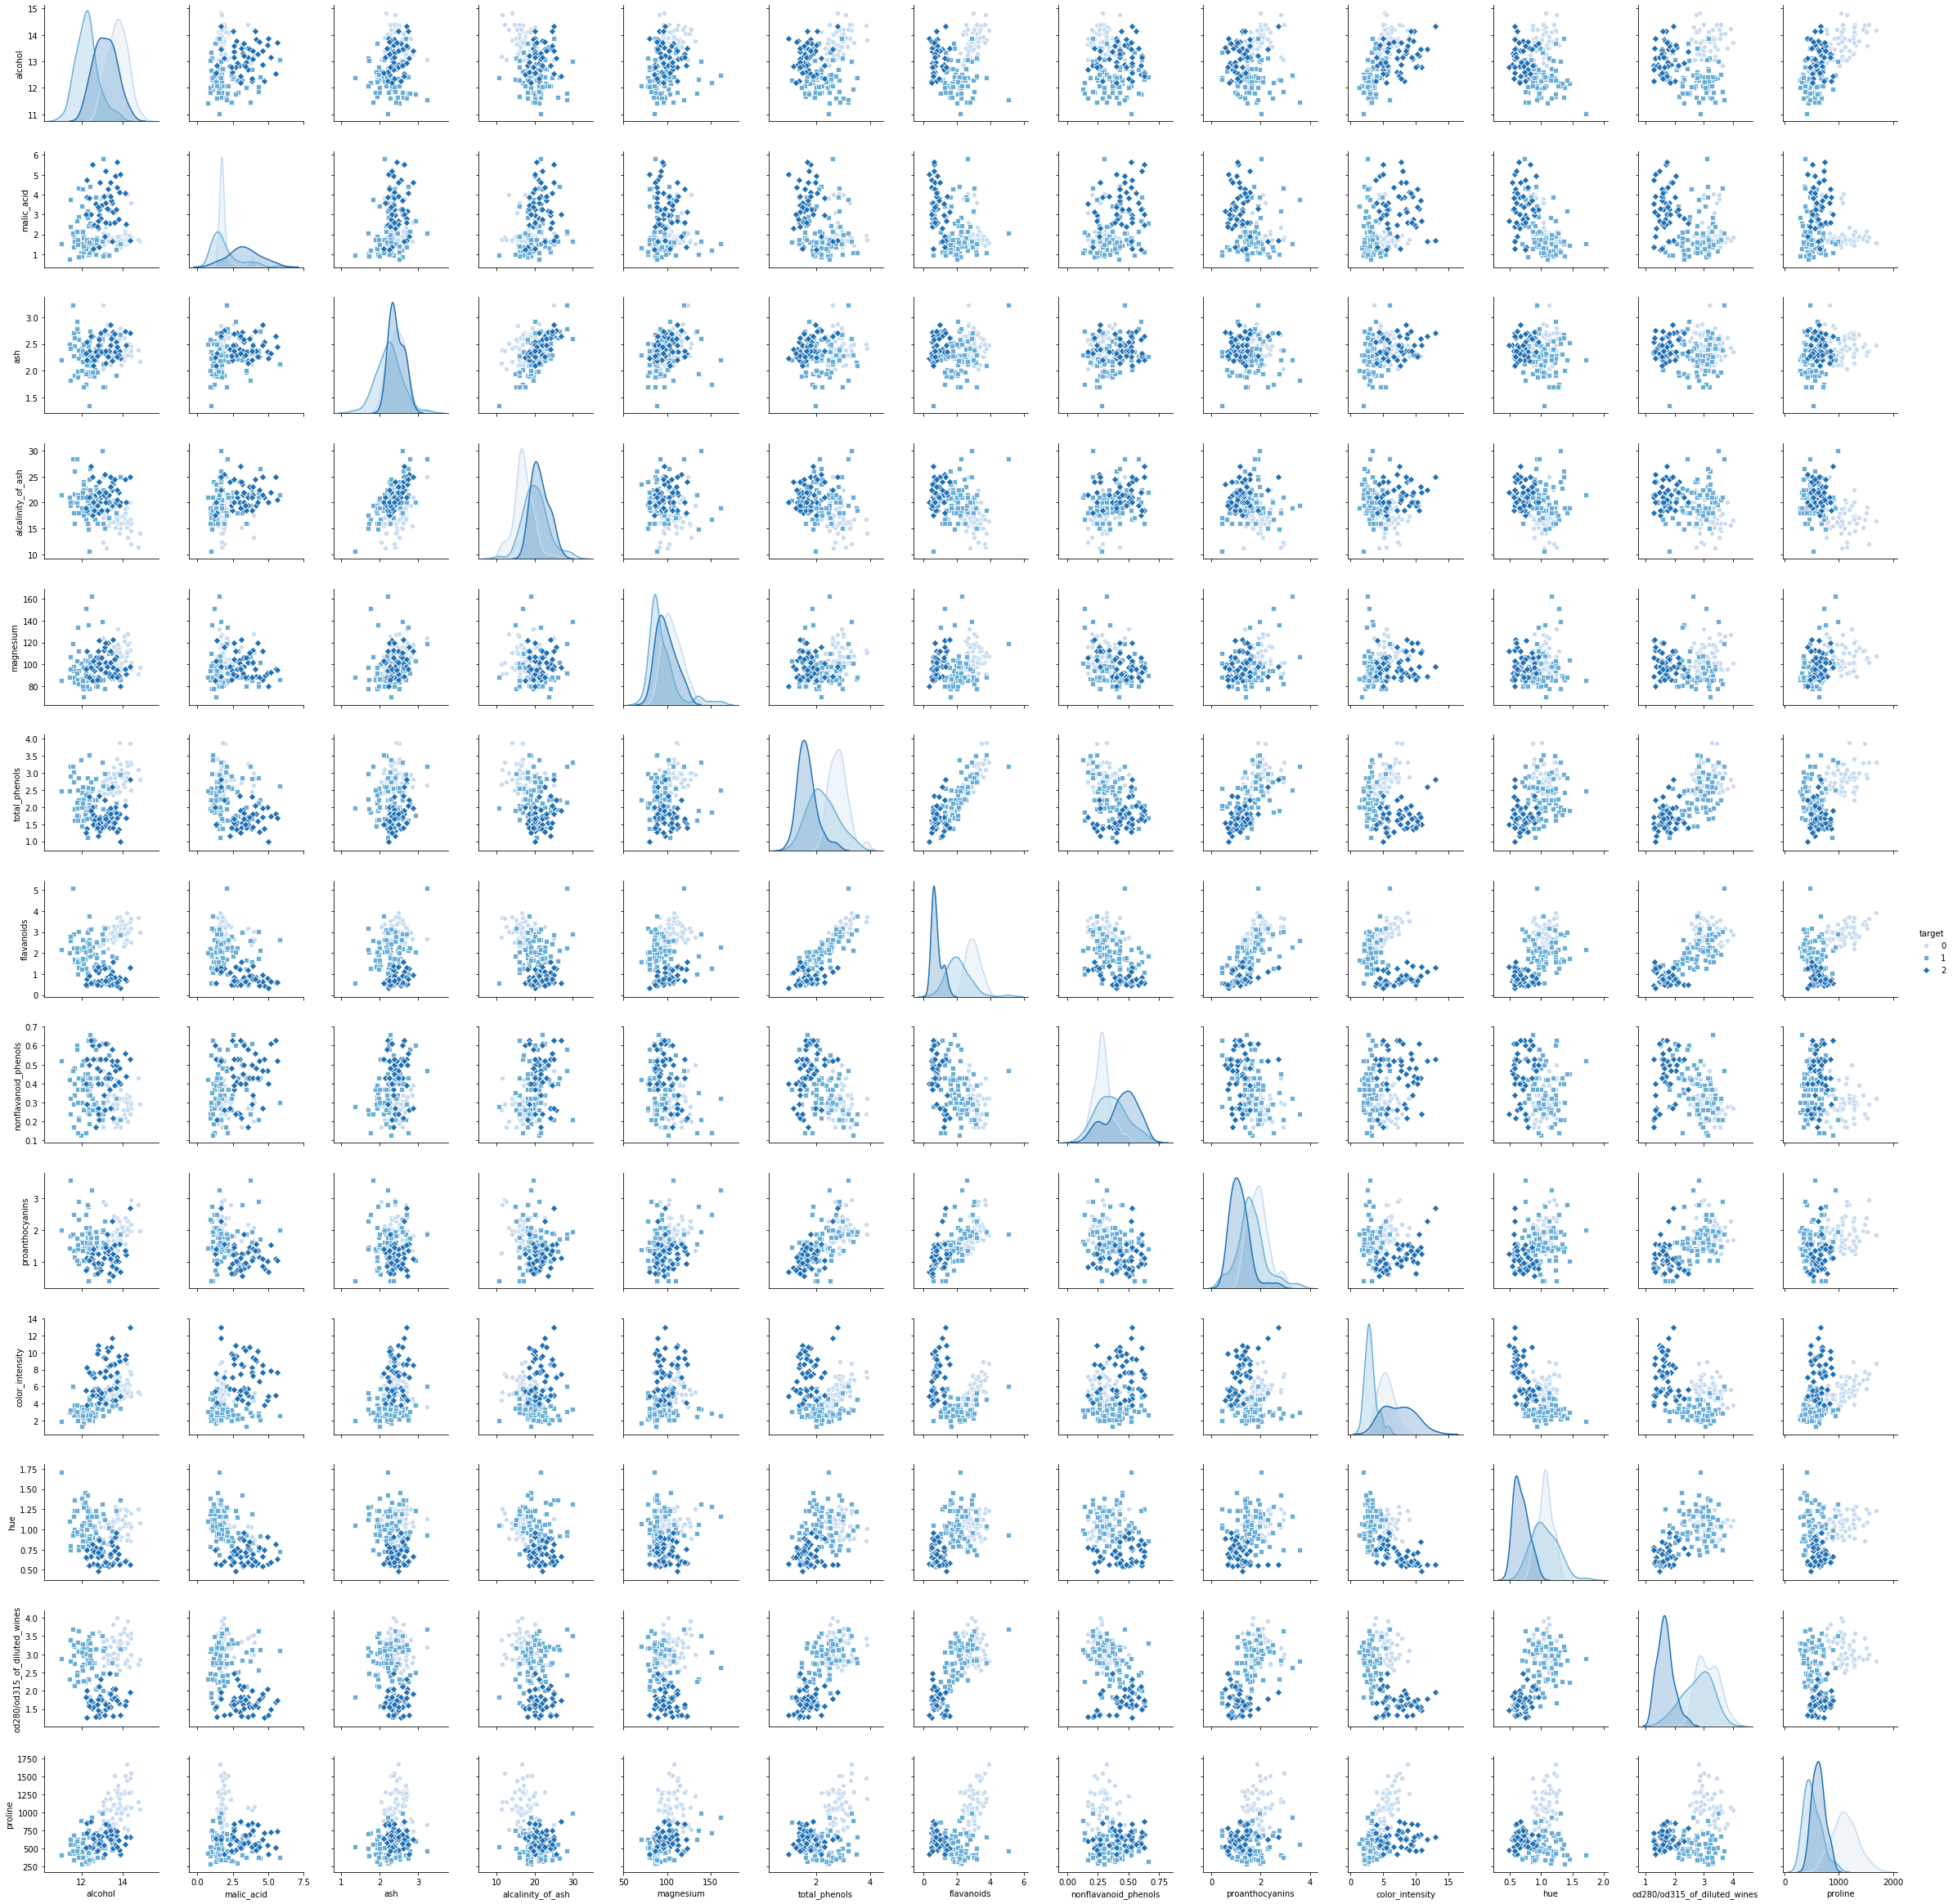

In [5]:
sns.pairplot(data=df_wine, vars=df_wine.columns[:-1], hue='target', markers=["o", "s", "D"], palette='Blues')

In [6]:
sns.pairplot(df_features, markers=)

SyntaxError: invalid syntax (<ipython-input-6-6da6cb5be316>, line 1)

In [ ]:
sns.pairplot(data=df_wine, vars=df_wine.columns[:-1], hue='target')

In [ ]:
palette = sns.color_palette("Blues") * 10
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(3,len(df_wine.columns[:-1]), figsize=(20,10))
for index, col in enumerate(df_wine.columns[:-1]):
    sns.boxplot(y=df_wine[col], ax=ax[0, index], color=palette[index])
    sns.violinplot(y=df_wine[col], ax=ax[1, index], color=palette[index])
#     sns.swarmplot(y=df_wine[col], ax=ax[1, index], color='orange', alpha=0.3)
    sns.boxplot(data=df_wine, y=df_wine[col], x='target', ax=ax[2, index])
    ax[0,index].set(xlabel=None, ylabel=None)
    ax[1,index].set(xlabel=None, ylabel=None)
    ax[2,index].set(xlabel=None, ylabel=None)

In [ ]:
X_train = df_wine.iloc[:,:-1].copy()
y_train = df_wine.iloc[:,-1].copy()
index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)


In [ ]:
# add some outliers to test transformation module

In [ ]:
import random
outlier_list = []
for i in range(len(df_wine.columns[:-1])):
    np.random.seed(RANDOM_STATE)
    max_temp = df_wine.iloc[:,i].max() * (np.random.randint(5,50))
    std_tmp = df_wine.iloc[:,i].std() * (np.random.randint(5,20))
    outlier_list.append(np.random.normal(max_temp,std_tmp, 20))

np.swapaxes(np.array(outlier_list),0,1)
df_outlier = pd.DataFrame(np.swapaxes(np.array(outlier_list),0,1))
random_target = [random.randrange(0, 3) for i in range(len(df_outlier))]

df_outlier = pd.concat([df_outlier, pd.DataFrame(random_target)], axis=1)
df_outlier.columns = df_wine.columns

df_wine_new = pd.concat([df_wine, df_outlier], axis=0, ignore_index=True)
df_wine_new.tail(10)

In [ ]:
sns.pairplot(data=df_wine_new, vars=df_wine_new.columns[:-1], hue='target')

In [ ]:
palette = sns.color_palette("Blues") * 10
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(2,len(df_wine_new.columns[:-1]), figsize=(20,10))
for index, col in enumerate(df_wine_new.columns[:-1]):
    sns.boxplot(y=df_wine_new[col], ax=ax[0, index], color=palette[index])
    sns.boxplot(data=df_wine_new, y=df_wine_new[col], x='target', ax=ax[1, index])
    ax[0,index].set(xlabel=None, ylabel=None)
    ax[1,index].set(xlabel=None, ylabel=None)

In [ ]:
X_train = df_wine_new.iloc[:,:-1].copy()
y_train = df_wine_new.iloc[:,-1].copy()
index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# super large outliers
outlier_list = []
for i in range(len(df_wine.columns[:-1])):
    np.random.seed(RANDOM_STATE)
    max_temp = df_wine.iloc[:,i].max() * (np.random.randint(50,200))
    std_tmp = df_wine.iloc[:,i].std() * (np.random.randint(5,20))
    outlier_list.append(np.random.normal(max_temp,std_tmp, 20))

np.swapaxes(np.array(outlier_list),0,1)
df_outlier = pd.DataFrame(np.swapaxes(np.array(outlier_list),0,1))
random_target = [random.randrange(0, 3) for i in range(len(df_outlier))]

df_outlier = pd.concat([df_outlier, pd.DataFrame(random_target)], axis=1)
df_outlier.columns = df_wine.columns

df_wine_new2 = pd.concat([df_wine, df_outlier], axis=0, ignore_index=True)


X_train = df_wine_new2.iloc[:,:-1].copy()
y_train = df_wine_new2.iloc[:,-1].copy()
index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# ensemble features
df_ensemble = pd.concat([pd.DataFrame(np.array(X_train_trans_list)[2]), 
#                          pd.DataFrame(np.array(X_train_trans_list)[3]),
                         pd.DataFrame(np.array(X_train_trans_list)[7])
                        ], axis=1, ignore_index=True)
    
# df_ensemble

pca = PCA()
X_train_pca = pca.fit_transform(df_ensemble)
# X_train_pca = 
fig, ax = plt.subplots(1, 2, figsize=(10, 40/8))
sns.scatterplot(x=X_train_pca[index_list,0], y=X_train_pca[index_list,1], 
                     hue=y_train[index_list], style=y_train[index_list],
                    ax = ax[0]
               )
sns.scatterplot(x=X_train_pca[index_list,0], y=X_train_pca[index_list,1], 
#                      hue=y_train[index_list], 
                style=y_train[index_list],
                    ax = ax[1]
               )
plt.legend(loc='upper right')
# ax[i].set_title(transformer_list[i])

In [ ]:
# our story didn't end here

In [ ]:
# test capability to handel one-hot encoding data

In [ ]:
# add a 'useful' feature
X_train = df_wine.iloc[:,:-1].copy()
y_train = df_wine.iloc[:,-1].copy()

y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.columns = ['_0', '_1', '_2']
X_train = pd.concat([X_train, y_train_dummy], axis=1)

y_train = df_wine.iloc[:,-1].copy()
index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# add a 'trash' feature
X_train = df_wine.iloc[:,:-1].copy()
y_train = df_wine.iloc[:,-1].copy()

np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              '_1':np.random.binomial(1, 0.5, size=len(X_train)),
#                               '_2':np.random.binomial(1, 0.9, size=len(X_train)),
#                               '_x':np.random.binomial(1, 0.7, size=len(X_train))
                             })
X_train_trash.index = X_train.index
X_train = pd.concat([X_train, X_train_trash], axis=1, ignore_index=True)



index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# add a 'trash' feature + outliers
X_train = df_wine_new.iloc[:,:-1].copy()
y_train = df_wine_new.iloc[:,-1].copy()

np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              '_1':np.random.binomial(1, 0.5, size=len(X_train)),
#                               '_2':np.random.binomial(1, 0.9, size=len(X_train)),
#                               '_x':np.random.binomial(1, 0.7, size=len(X_train))
                             })
X_train_trash.index = X_train.index
X_train = pd.concat([X_train, X_train_trash], axis=1, ignore_index=True)



index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# add both 'useful' and  flodded 'trash' feature
X_train = df_wine.iloc[:,:-1].copy()
y_train = df_wine.iloc[:,-1].copy()

y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.columns = ['y_0', 'y_1', 'y_2']
np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'x_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              'x_1':np.random.binomial(1, 0.2, size=len(X_train)),
                              'x_2':np.random.binomial(1, 0.3, size=len(X_train)),
                              'x_3':np.random.binomial(1, 0.4, size=len(X_train)),
                              'x_4':np.random.binomial(1, 0.5, size=len(X_train)),
                              'x_5':np.random.binomial(1, 0.6, size=len(X_train)),
                              'x_6':np.random.binomial(1, 0.7, size=len(X_train)),
                              'x_7':np.random.binomial(1, 0.8, size=len(X_train)),
                              'x_8':np.random.binomial(1, 0.9, size=len(X_train)),                             
                             })
X_train_trash.index = X_train.index
X_train = pd.concat([X_train, y_train_dummy, X_train_trash], axis=1)


index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# add both 'useful' and  flodded 'trash' feature + outliers
X_train = df_wine_new.iloc[:,:-1].copy()
y_train = df_wine_new.iloc[:,-1].copy()

y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.columns = ['y_0', 'y_1', 'y_2']
np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'x_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              'x_1':np.random.binomial(1, 0.2, size=len(X_train)),
                              'x_2':np.random.binomial(1, 0.3, size=len(X_train)),
                              'x_3':np.random.binomial(1, 0.4, size=len(X_train)),
                              'x_4':np.random.binomial(1, 0.5, size=len(X_train)),
                              'x_5':np.random.binomial(1, 0.6, size=len(X_train)),
                              'x_6':np.random.binomial(1, 0.7, size=len(X_train)),
                              'x_7':np.random.binomial(1, 0.8, size=len(X_train)),
                              'x_8':np.random.binomial(1, 0.9, size=len(X_train)),                             
                             })
X_train_trash.index = X_train.index
X_train = pd.concat([X_train, y_train_dummy, X_train_trash], axis=1)


index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# take a look at the new distribution

In [ ]:
X_train = df_wine_new.iloc[:,:-1].copy()
y_train = df_wine_new.iloc[:,-1].copy()

y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.columns = ['y_0', 'y_1', 'y_2']
np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'x_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              'x_1':np.random.binomial(1, 0.2, size=len(X_train)),
                              'x_2':np.random.binomial(1, 0.3, size=len(X_train)),
                              'x_3':np.random.binomial(1, 0.4, size=len(X_train)),
                              'x_4':np.random.binomial(1, 0.5, size=len(X_train)),
                              'x_5':np.random.binomial(1, 0.6, size=len(X_train)),
                              'x_6':np.random.binomial(1, 0.7, size=len(X_train)),
                              'x_7':np.random.binomial(1, 0.8, size=len(X_train)),
                              'x_8':np.random.binomial(1, 0.9, size=len(X_train)),                             
                             })
X_train_trash.index = X_train.index
X_train = pd.concat([X_train, y_train_dummy, X_train_trash], axis=1)

# X_train

# df_tmp

In [ ]:
palette = sns.color_palette("Blues") * 10
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(2,len(X_train.columns[:-1]), figsize=(20,10))
for index, col in enumerate(X_train.columns[:-1]):
    sns.boxplot(y=X_train[col], ax=ax[0, index], color=palette[index])
    sns.violinplot(y=X_train[col], ax=ax[1, index], color=palette[index])
#     sns.boxplot(data=X_train, y=X_train[col], x='target', ax=ax[2, index])
    ax[0,index].set(xlabel=None, ylabel=None)
    ax[1,index].set(xlabel=None, ylabel=None)
#     ax[2,index].set(xlabel=None, ylabel=None)

In [ ]:
pt = PowerTransformer()
df_trans = pt.fit_transform(X_train)

df_trans = pd.DataFrame(df_trans)
df_trans = pd.concat([df_trans, df_wine_new.target], axis=1)



In [ ]:
palette = sns.color_palette("Blues") * 10
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(2,len(df_trans.columns[:-1]), figsize=(20,10))
for index, col in enumerate(df_trans.columns[:-1]):
    sns.boxplot(y=df_trans[col], ax=ax[0, index], color=palette[index])
    sns.violinplot(y=df_trans[col], ax=ax[1, index], color=palette[index])
#     sns.boxplot(data=df_tmp, y=df_tmp[col], x='target', ax=ax[2, index])
    ax[0,index].set(xlabel=None, ylabel=None)
    ax[1,index].set(xlabel=None, ylabel=None)
#     ax[2,index].set(xlabel=None, ylabel=None)

In [ ]:
pca = PCA()
df_tmp = pca.fit_transform(df_trans.iloc[:,:-1])
df_tmp = pd.DataFrame(df_tmp)
df_tmp = pd.concat([df_tmp, df_wine_new.target], axis=1)

In [ ]:
palette = sns.color_palette("Blues") * 10
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(2,len(df_tmp.columns[:-1]), figsize=(20,10))
for index, col in enumerate(df_tmp.columns[:-1]):
    sns.boxplot(y=df_tmp[col], ax=ax[0, index], color=palette[index])
    sns.violinplot(y=df_tmp[col], ax=ax[1, index], color=palette[index])
#     sns.boxplot(data=df_tmp, y=df_tmp[col], x='target', ax=ax[2, index])
    ax[0,index].set(xlabel=None, ylabel=None)
    ax[1,index].set(xlabel=None, ylabel=None)
#     ax[2,index].set(xlabel=None, ylabel=None)

In [ ]:
plt.hist(X_train.iloc[:,17], alpha=0.7)
plt.hist(df_trans.iloc[:,17], alpha=0.7)
plt.hist(df_tmp.iloc[:,17], alpha=0.7)
plt.legend(['X_train', 'df_trans', 'df_tmp' ])

In [ ]:
# what if we combine/ensemble QuantileTransform on continous data and PowerTransform on binarial, after that perform StandardScaler

In [ ]:
# add both 'useful' and  flodded 'trash' feature
X_train = df_wine.iloc[:,:-1].copy()
y_train = df_wine.iloc[:,-1].copy()

y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.columns = ['y_0', 'y_1', 'y_2']
np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'x_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              'x_1':np.random.binomial(1, 0.2, size=len(X_train)),
                              'x_2':np.random.binomial(1, 0.3, size=len(X_train)),
                              'x_3':np.random.binomial(1, 0.4, size=len(X_train)),
                              'x_4':np.random.binomial(1, 0.5, size=len(X_train)),
                              'x_5':np.random.binomial(1, 0.6, size=len(X_train)),
                              'x_6':np.random.binomial(1, 0.7, size=len(X_train)),
                              'x_7':np.random.binomial(1, 0.8, size=len(X_train)),
                              'x_8':np.random.binomial(1, 0.9, size=len(X_train)),                             
                             })
X_train_trash.index = X_train.index
# X_train = pd.concat([X_train, y_train_dummy, X_train_trash], axis=1)


df_ensemble = pd.concat([pd.DataFrame(QuantileTransformer().fit_transform(X_train)), 
#                          pd.DataFrame(PowerTransformer().fit_transform(y_train_dummy)),
                         pd.DataFrame(QuantileTransformer().fit_transform(X_train_trash))
                        ], axis=1, ignore_index=True)
    
df_ensemble = StandardScaler().fit_transform(df_ensemble)

pca = PCA()
X_train_pca = pca.fit_transform(df_ensemble)
# X_train_pca = 
fig, ax = plt.subplots(1, 2, figsize=(10, 40/8))
sns.scatterplot(x=X_train_pca[index_list,0], y=X_train_pca[index_list,1], 
                     hue=y_train[index_list], style=y_train[index_list],
                    ax = ax[0]
               )
sns.scatterplot(x=X_train_pca[index_list,0], y=X_train_pca[index_list,1], 
#                      hue=y_train[index_list], 
                style=y_train[index_list],
                    ax = ax[1]
               )
plt.legend(loc='upper right')
# ax[i].set_title(transformer_list[i])

In [ ]:
# it is very similar to the result from standalone PowerTransform 

In [ ]:
# bonus, housing data

In [ ]:
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

In [ ]:
# sample_size = len(X_full)//1
# X_full = X_full[:sample_size]
# y_full = y_full[:sample_size]

In [ ]:
# create labels, transfer to classification problem
df_X = pd.DataFrame(X_full)
df_X.columns = dataset.feature_names

df_y = pd.DataFrame(y_full)
df_y.columns = ['price']

print(df_y.sort_values(by='price').iloc[len(df_y)//3])
print(df_y.sort_values(by='price').iloc[len(df_y)//3*2])

df_y['target'] = df_y.price.apply(lambda x: 0 if x<1.414 else (1 if  x<2.304 else 2))
# df_y

df_housing = pd.concat([df_X, df_y.target], axis=1)
df_housing.info()

In [ ]:
sns.distplot(df_y[df_y.target==2].price, label="high")
sns.distplot(df_y[df_y.target==1].price, label="median")
sns.distplot(df_y[df_y.target==0].price, label="low")
plt.legend()


In [ ]:
sns.pairplot(data=df_housing, vars=df_housing.columns[:-1], hue='target')

In [ ]:
palette = sns.color_palette("Blues") * 10
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(3,len(df_housing.columns[:-1]), figsize=(20,10))
for index, col in enumerate(df_housing.columns[:-1]):
    sns.boxplot(y=df_housing[col], ax=ax[0, index], color=palette[index])
    sns.violinplot(y=df_housing[col], ax=ax[1, index], color=palette[index])
#     sns.swarmplot(y=df_housing[col], ax=ax[1, index], color='orange', alpha=0.3)
    sns.boxplot(data=df_housing, y=df_housing[col], x='target', ax=ax[2, index])
    ax[0,index].set(xlabel=None, ylabel=None)
    ax[1,index].set(xlabel=None, ylabel=None)
    ax[2,index].set(xlabel=None, ylabel=None)

In [ ]:
X_train = df_housing.iloc[:,:-1].copy()
y_train = df_housing.iloc[:,-1].copy()


index_list = X_train.index.isin(range(len(df_y)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# bonus 2, look inside power transfomer, whether it is robust to transforming binomial data (after one-hot-encoding),
# considering distribution and data size.

In [ ]:
test_size = 200
# X_train = df_wine.iloc[:,:-1].copy()

fig, ax = plt.subplots(1,9, figsize=(20,5))
# for index in range(9):
for index,p in enumerate(np.linspace(0.1, 0.9, num=9)):
#     print (index)
#     print (p)
#     p = index / 10
    np.random.seed(seed=RANDOM_STATE)
    data_binomial = np.random.binomial(1, p=p, size=test_size)
    # data_binomial
    sns.scatterplot(range(len(data_binomial)), data_binomial, ax=ax[index,])
    pt = PowerTransformer()
    data_trans = pt.fit_transform(data_binomial.reshape(-1, 1))
    sns.scatterplot(range(len(data_trans)), data_trans.ravel(), ax=ax[index,])
    data_trans_new_one = pt.transform(np.array(1).reshape(1, -1))
    data_trans_new_zero = pt.transform(np.array(0).reshape(1, -1))
    ax[index,].set_ylim([-4,4])
    ax[index,].set_title('p={:.2f}'.format(p))

    

In [ ]:
fig, ax = plt.subplots(1,9, figsize=(20,5))
# for index in range(9):
for index,test_size in enumerate(np.logspace(1, 9, num=9, base=4)):
#     print (index)
#     print (p)
#     p = index / 10
    np.random.seed(seed=RANDOM_STATE)
    data_binomial = np.random.binomial(1, p=0.1, size=int(test_size))
    # data_binomial
    sns.scatterplot(range(len(data_binomial)), data_binomial, ax=ax[index,])
    pt = PowerTransformer()
    data_trans = pt.fit_transform(data_binomial.reshape(-1, 1))
    sns.scatterplot(range(len(data_trans)), data_trans.ravel(), ax=ax[index,])
    data_trans_new_one = pt.transform(np.array(1).reshape(1, -1))
    data_trans_new_zero = pt.transform(np.array(0).reshape(1, -1))
    ax[index,].set_ylim([-4,4])
    ax[index,].set_title('size={:.2e}'.format(test_size))


# last note:
PCA is a dimensionality reduction method, to be more specific it is a whitening tool, and it belongs to unsupervised learning approaches. For unsupervised learning, the goal is to extract certain pattern from the data, a lot of times, unsupervised learning appears more like feature engineering processings instead of machine learning. And many times, the result from unsupervised learning can be unwield to evaluate. Based on my experience, this claim also holds true for PCA, i.e. PCA would not always work well, because it might not always discover pattern that we desire, which is the burdern of pure unsupervised learning. The intention of this post is to emphasize that for those cases that PCA might work, don't let the chance goes away because of sloppy outlier handeling.